In [23]:
class Prisoner:
    def __init__(self, episode_max, known):
        self.episode_max = episode_max
        self.known = known
        
    def get_utility(self, action_my, action_against):
        if action_my == action_against:
            if action_my == 'M':
                return -10
            else:
                return -20
        elif action_my == 'M':
            return -25
        else:
            return 0
        
    def get_action(self, episode, history):
        if self.known:
            if self.episode_max != None:
                if self.episode_max == episode:
                    return 'Z'
                elif len(history) == 0:
                    return 'M'
                elif history[-1] == 'Z':
                    return 'Z'
                elif history[-1] == 'M':
                    return 'M'
            else:
                if len(history) == 0:
                    return 'M'
                elif history[-1] == 'Z':
                    return 'Z'
                elif history[-1] == 'M':
                    return 'M'
        else:
            if len(history) == 0:
                return 'M'
            elif history[-1] == 'Z':
                return 'Z'
            elif history[-1] == 'M':
                return 'M'

In [24]:
import random
class PrisonerStupid:
    def __init__(self, episode_max, known):
        self.episode_max = episode_max
        self.known = known
        
    def get_utility(self, action_my, action_against):
        if action_my == action_against:
            if action_my == 'M':
                return -10
            else:
                return -20
        elif action_my == 'M':
            return -25
        else:
            return 0
        
    def get_action(self, episode, history):
        return random.choice(['M','Z'])

In [33]:
import matplotlib.pylab as plt
from IPython import display
%matplotlib inline


def plot_utilities(utilities):
    plt.figure(figsize=(14,6))
    plt.plot(utilities)
    display.display(plt.gcf())
    display.clear_output(wait=True)

    
def run_game(prisoner1, prisoner2, episodes, known = True,plot=False):
    utilities = []
    history_prisoner_1 = []
    history_prisoner_2 = []
   
    if episodes == None: #nieskończoność
        episode = None
        counter = 0
        while counter <1000:
            counter += 1
            history_prisoner_1.append(prisoner1.get_action(episode, history_prisoner_2))
            history_prisoner_2.append(prisoner2.get_action(episode, history_prisoner_1))        
            utilities.append(prisoner1.get_utility(history_prisoner_1[-1], history_prisoner_2[-1]))

    else:      
        for episode in range(episodes):
            if known:
                history_prisoner_1.append(prisoner1.get_action(episode, history_prisoner_2))
                history_prisoner_2.append(prisoner2.get_action(episode, history_prisoner_1)) 
            else:
                history_prisoner_1.append(prisoner1.get_action(-1, history_prisoner_2))
                history_prisoner_2.append(prisoner2.get_action(-1, history_prisoner_1))
            utilities.append(prisoner1.get_utility(history_prisoner_1[-1], history_prisoner_2[-1]))

    if plot:
        plot_utilities(utilities)
    print(history_prisoner_1)
    print(history_prisoner_2)
    return utilities  

['M', 'Z', 'M', 'Z', 'Z', 'M']
['Z', 'M', 'Z', 'Z', 'M', 'M']


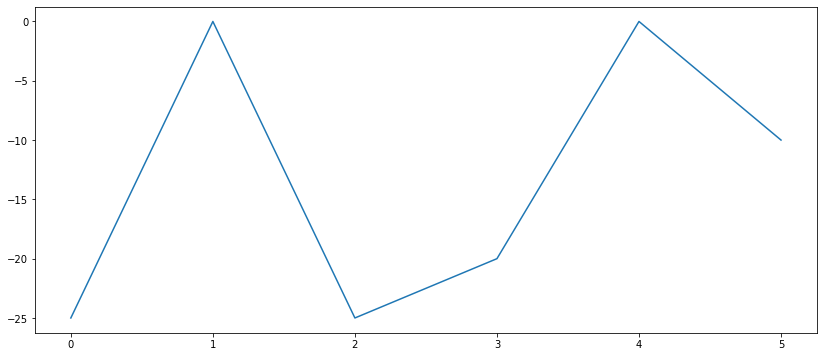

In [34]:
stupid_prisoner = PrisonerStupid(6, True)
prisoner = Prisoner(6, True)
utilities = run_game(prisoner, stupid_prisoner, 6, True, True)

In [35]:
utilities

[-25, 0, -25, -20, 0, -10]

['M', 'Z', 'M', 'Z', 'Z', 'M']
['Z', 'M', 'Z', 'Z', 'M', 'M']


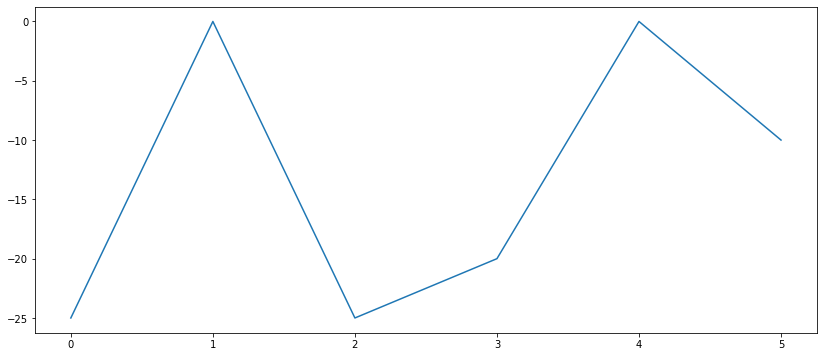

In [36]:
stupid_prisoner = PrisonerStupid(6, False)
prisoner = Prisoner(6, False)
utilities = run_game(prisoner, stupid_prisoner, 6, False, True)

In [37]:
utilities

[-25, 0, -25, -20, 0, -10]

['M', 'M', 'Z', 'Z', 'Z', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'Z', 'M', 'M', 'Z', 'M', 'Z', 'Z', 'Z', 'M', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'M', 'Z', 'Z', 'M', 'M', 'Z', 'M', 'Z', 'M', 'Z', 'M', 'M', 'M', 'Z', 'M', 'Z', 'M', 'Z', 'Z', 'M', 'M', 'Z', 'Z', 'Z', 'M', 'M', 'Z', 'Z', 'Z', 'M', 'Z', 'M', 'M', 'M', 'M', 'M', 'M', 'Z', 'M', 'Z', 'M', 'M', 'Z', 'M', 'Z', 'M', 'M', 'Z', 'M', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'M', 'M', 'Z', 'M', 'M', 'M', 'Z', 'M', 'Z', 'Z', 'M', 'M', 'Z', 'M', 'Z', 'M', 'M', 'Z', 'M', 'Z', 'M', 'M', 'M', 'Z', 'Z', 'M', 'M', 'M', 'M', 'Z', 'Z', 'Z', 'Z', 'M', 'Z', 'Z', 'Z', 'M', 'M', 'M', 'M', 'M', 'M', 'Z', 'Z', 'Z', 'M', 'Z', 'Z', 'Z', 'M', 'Z', 'Z', 'M', 'M', 'Z', 'M', 'Z', 'Z', 'Z', 'Z', 'M', 'M', 'Z', 'M', 'Z', 'Z', 'M', 'Z', 'Z', 'Z', 'M', 'Z', 'M', 'M', 'M', 'M', 'M', 'Z', 'M', 'Z', 'M', 'Z', 'Z', 'M', 'M', 'Z', 'Z', 'M', 'M', 'Z', 'Z', 'M', 'M', 'Z', 'Z', 'M', 'M', 'Z', 'Z', 'M', 'M', 'M', 'Z', 'M', 'M', 'Z', 'M', 'Z', 'M', 'M', 'M', 'Z', 'Z',

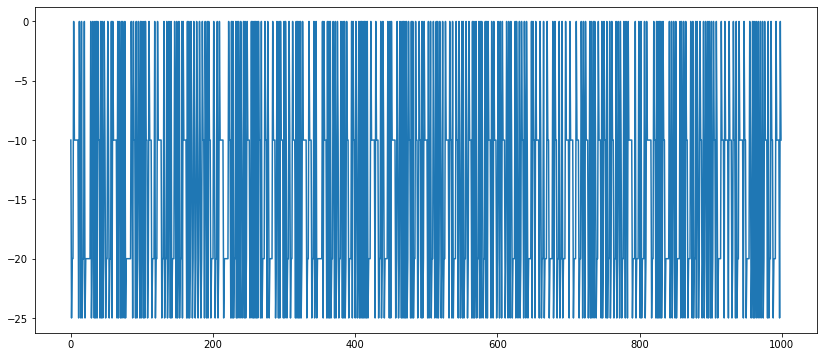

In [38]:
stupid_prisoner = PrisonerStupid(None, True)
prisoner = Prisoner(None, True)
utilities = run_game(prisoner, stupid_prisoner, None, True, True)

In [39]:
utilities

[-10,
 -25,
 -20,
 -20,
 0,
 -10,
 -10,
 -10,
 -10,
 -10,
 -10,
 -25,
 0,
 -10,
 -25,
 0,
 -25,
 -20,
 -20,
 0,
 -25,
 -20,
 -20,
 -20,
 -20,
 -20,
 -20,
 -20,
 0,
 -25,
 -20,
 0,
 -10,
 -25,
 0,
 -25,
 0,
 -25,
 0,
 -10,
 -10,
 -25,
 0,
 -25,
 0,
 -25,
 -20,
 0,
 -10,
 -25,
 -20,
 -20,
 0,
 -10,
 -25,
 -20,
 -20,
 0,
 -25,
 0,
 -10,
 -10,
 -10,
 -10,
 -10,
 -25,
 0,
 -25,
 0,
 -10,
 -25,
 0,
 -25,
 0,
 -10,
 -25,
 0,
 -25,
 -20,
 -20,
 -20,
 -20,
 -20,
 -20,
 -20,
 0,
 -10,
 -25,
 0,
 -10,
 -10,
 -25,
 0,
 -25,
 -20,
 0,
 -10,
 -25,
 0,
 -25,
 0,
 -10,
 -25,
 0,
 -25,
 0,
 -10,
 -10,
 -25,
 -20,
 0,
 -10,
 -10,
 -10,
 -25,
 -20,
 -20,
 -20,
 0,
 -25,
 -20,
 -20,
 0,
 -10,
 -10,
 -10,
 -10,
 -10,
 -25,
 -20,
 -20,
 0,
 -25,
 -20,
 -20,
 0,
 -25,
 -20,
 0,
 -10,
 -25,
 0,
 -25,
 -20,
 -20,
 -20,
 0,
 -10,
 -25,
 0,
 -25,
 -20,
 0,
 -25,
 -20,
 -20,
 0,
 -25,
 0,
 -10,
 -10,
 -10,
 -10,
 -25,
 0,
 -25,
 0,
 -25,
 -20,
 0,
 -10,
 -25,
 -20,
 0,
 -10,
 -25,
 -20,
 0,
 -10,
 -25,
 -20,
 0,
